In [1]:
import numpy as np
from time import sleep, time

In [2]:
import os

In [3]:
import tables

In [4]:
import pandas as pd

In [5]:
from scipy.interpolate import interp1d

In [6]:
from astropy.cosmology import FlatLambdaCDM, Planck18

In [7]:
import vrpy_tools

In [8]:
from gadget_tools import Snapshot, read_positions_all_files, read_partIDs_all_files, read_all_hdf5

In [9]:
from pm_tools import assign_density, assign_density_sph, project_to_slice, Region, Transform

In [10]:
# import yt
# import numpy as np
# import yt.units as units
# import pylab
import sphviewer
from sphviewer.tools import QuickView

In [11]:
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

In [12]:
import yt
# import yt.units as units

/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:768: MatplotlibDeprecationWarning: The global colormaps dictionary is no longer considered public API.
  self[key]


In [13]:
# 

In [14]:
# L=200
# N = 256
# i=12
# rund='r21'

In [15]:
# siminfo = vrpy_tools.ReadSimInfo(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/halos_vr_6d/out_{i:03d}")

In [16]:
# config = vrpy_tools.ReadConfigInfo(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/halos_vr_6d/out_{i:03d}")

In [312]:
snapfile_dmo = "/scratch/cprem/download//IllTNG/TNG50-4-Dark/snaps/snap_099"

In [313]:
snap_dmo = Snapshot(snapfile_dmo+'.0')
# vars(snap_dmo)

In [314]:
posd_dmo = read_all_hdf5('Coordinates', 1, snapfile_dmo)
posd_dmo.shape

(19683000, 3)

In [315]:
snapfile = "/scratch/cprem/download/IllTNG/TNG50-4/snaps/snap_099"
snap = Snapshot(snapfile+'.0')
# vars(snap)

In [316]:
posd = read_all_hdf5('Coordinates', 1, snapfile)
posd.shape

(19683000, 3)

In [328]:
posb = np.concatenate( [read_all_hdf5('Coordinates', 0, snapfile), read_all_hdf5('Coordinates', 4, snapfile)] )
posb.shape

(19145883, 3)

In [329]:
massb = np.concatenate( [read_all_hdf5('Masses', 0, snapfile), read_all_hdf5('Masses', 4, snapfile)] )
densprtb = np.concatenate( [read_all_hdf5('Density', 0, snapfile), read_all_hdf5('SubfindDensity', 4, snapfile)] )

In [330]:
massb.shape

(19145883,)

In [331]:
hsmlb = (massb/densprtb)**(1/3)/2

In [108]:
np.percentile(hsmlb,20)

12.108013534545899

In [109]:
snap.box_size

35000.0

In [110]:
# a = siminfo['ScaleFactor']
# z = 1/a - 1
# h = siminfo['h_val']
# Om_m = siminfo['Omega_m']

In [111]:
a = 1
z = 1/a - 1
# h = snap.Hubble_param
# Om_m = snap.Omega_m_0

In [112]:
p18py = Planck18

In [28]:
a**3

1

In [308]:
hals = tables.open_file("/scratch/cprem/download/IllTNG/TNG50-4/halos/fof_subhalo_tab_099.0.hdf5", 'r')
hals_dmo = tables.open_file("/scratch/cprem/download/IllTNG/TNG50-4-Dark/halos/fof_subhalo_tab_099.0.hdf5", 'r')

In [309]:
hals.root.Group.Group_M_Crit200[0]

12345.075

In [275]:
hals.root.Group.GroupPos[0]

array([ 7311.818, 24546.766, 21297.25 ], dtype=float32)

In [276]:
# hals.root.IDs

In [277]:
hals.root.Group.Group_R_Crit200[0]

809.7986

In [278]:
R = hals_dmo.root.Group.Group_R_Crit200[0]
R

803.55133

In [279]:
# hal_cen = np.array([ 7311.818, 24546.766, 21297.25 ])
hal_cen = hals.root.Group.GroupPos[0]
hal_cen_dmo = hals_dmo.root.Group.GroupPos[0]

In [280]:
hals_dmo.root.Group.Group_M_Crit200[:3]

array([12060.518 ,  6265.1777,  4324.1597], dtype=float32)

In [281]:
# hal_cen_dmo = np.array([ 7306.57 , 24566.24 , 21315.838])

In [41]:
%load_ext autoreload

In [51]:
%autoreload 1

In [52]:
# np.logical_and.reduce((posd[:,0]>X-loc_box*R), (posd[:,0]<X+loc_box*R), (posd[:,1]>Y-loc_box*R), (posd[:,1]<Y+loc_box*R), (posd[:,2]>Z-loc_box*R), (posd[:,2]<Z+loc_box*R))

In [282]:
loc_box = 2

In [283]:
proj_axis = 2

In [284]:
# hal_cen = np.array([X,Y,Z])
hal_cen

array([ 7311.818, 24546.766, 21297.25 ], dtype=float32)

In [285]:
# snap_dmo = Snapshot(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/snaps/snapdir_{i:03d}/snapshot_{i:03d}.0")

In [286]:
region_dmo = Region('cube', cen=hal_cen_dmo,side=2*loc_box*R,box_size=snap_dmo.box_size)
region = Region('cube', cen=hal_cen,side=2*loc_box*R,box_size=snap.box_size)

In [287]:
# select_index = region.selectPrtcl(posd_dmo, engine='c++')
# posd_dmo_sele = region.shift_origin(posd_dmo[select_index])

In [288]:
# posd_dmo_sele+loc_box*R

In [289]:
# posd_dmo_sel

In [290]:
# select_index[0].shape

In [291]:
# seld_ind_dmo[0].shape

In [292]:
# posd_dmo = read_positions_all_files(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/snaps/snapdir_{i:03d}/snapshot_{i:03d}", prtcl_type='Halo', downsample=1)

In [293]:
# seld_ind_dmo = np.where((posd_dmo[:,0]>X-loc_box*R) & (posd_dmo[:,0]<X+loc_box*R) & (posd_dmo[:,1]>Y-loc_box*R) & (posd_dmo[:,1]<Y+loc_box*R) & (posd_dmo[:,2]>Z-loc_box*R) & (posd_dmo[:,2]<Z+loc_box*R))
# posd_dmo_sel = posd_dmo[seld_ind_dmo].copy()
# posd_dmo_sel -= np.array([X-loc_box*R,Y-loc_box*R,Z-loc_box*R])
# posd_dmo_sel.max()

In [294]:
seld_ind_dmo = region_dmo.selectPrtcl(posd_dmo, engine='c++')
posd_dmo_sel = region_dmo.shift_origin(posd_dmo[seld_ind_dmo])
posd_dmo_sel_noneg = posd_dmo_sel + loc_box*R
posd_dmo_sel.max()


    selection bool array obtained
0.27699947357177734

    selection index array obtained
0.01764082908630371


1607.1016929869947

In [295]:
rhod_dmo = assign_density(posd_dmo_sel_noneg, 2*loc_box*R, scheme='TSC', overdensity=False, grid_size=512)
rhod_dmo_slice = rhod_dmo.mean(axis=proj_axis)

In [296]:
# vars(snap_dmo)

In [297]:
# snap = Snapshot(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18_bar/{rund:s}/snaps/snapdir_{i:03d}/snapshot_{i:03d}.0")

In [298]:
# posd = read_positions_all_files(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18_bar/{rund:s}/snaps/snapdir_{i:03d}/snapshot_{i:03d}", prtcl_type='Halo', downsample=1)

In [299]:
# posb = read_positions_all_files(f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18_bar/{rund:s}/snaps/snapdir_{i:03d}/snapshot_{i:03d}", prtcl_type='Gas', downsample=1)

In [300]:
# seld_ind = np.where((posd[:,0]>X-loc_box*R) & (posd[:,0]<X+loc_box*R) & (posd[:,1]>Y-loc_box*R) & (posd[:,1]<Y+loc_box*R) & (posd[:,2]>Z-loc_box*R) & (posd[:,2]<Z+loc_box*R))
# posd_sel = posd[seld_ind].copy()
# posd_sel -= np.array([X-loc_box*R,Y-loc_box*R,Z-loc_box*R])
# posd_sel.max()

In [301]:
seld_ind = region.selectPrtcl(posd, engine='c++')
posd_sel = region.shift_origin(posd[seld_ind])
posd_sel_noneg = posd_sel + loc_box*R
posd_sel_noneg.max()


    selection bool array obtained
0.24059677124023438

    selection index array obtained
0.016941547393798828


3214.2048771147165

In [302]:
rhod = assign_density(posd_sel_noneg, 2*loc_box*R, scheme='TSC', overdensity=False, grid_size=512)
rhod_slice = rhod.mean(axis=proj_axis)

In [303]:
# selb_ind = np.where((posb[:,0]>X-loc_box*R) & (posb[:,0]<X+loc_box*R) & (posb[:,1]>Y-loc_box*R) & (posb[:,1]<Y+loc_box*R) & (posb[:,2]>Z-loc_box*R) & (posb[:,2]<Z+loc_box*R))
# posb_sel = posb[selb_ind].copy()
# posb_sel -= np.array([X-loc_box*R,Y-loc_box*R,Z-loc_box*R])
# posb_sel.max()

In [304]:
selb_ind = region.selectPrtcl(posb, engine='c++')
posb_sel = region.shift_origin(posb[selb_ind])
posb_sel_noneg = posb_sel + loc_box*R
posb_sel_noneg.max()


    selection bool array obtained
0.16881656646728516

    selection index array obtained
0.016518831253051758


3214.203546788329

In [ ]:
rhob = assign_density_sph(posb_sel_noneg, massb[selb_ind], hsmlb[selb_ind], 2*loc_box*R, grid_size=512, scheme='cubic', return_grid='density')
rhob_slice = rhob.mean(axis=proj_axis)

In [ ]:
rhob.mean()

In [115]:
rhob.mean()*(4*R)**3

2668.466442734431

In [116]:
massb[selb_ind].sum()

2845.2031

In [85]:
posd_dmo_sel.shape

(1082321, 3)

In [86]:
# rhod_slice

In [117]:
def find_peak_idx(arr):
    return np.unravel_index(arr.argmax(), arr.shape)
def find_peak(arr, extent_cube):
    indx = find_peak_idx(arr)
    return (np.array(indx)/arr.shape[0]) * (extent_cube[1]-extent_cube[0]) + extent_cube[0]

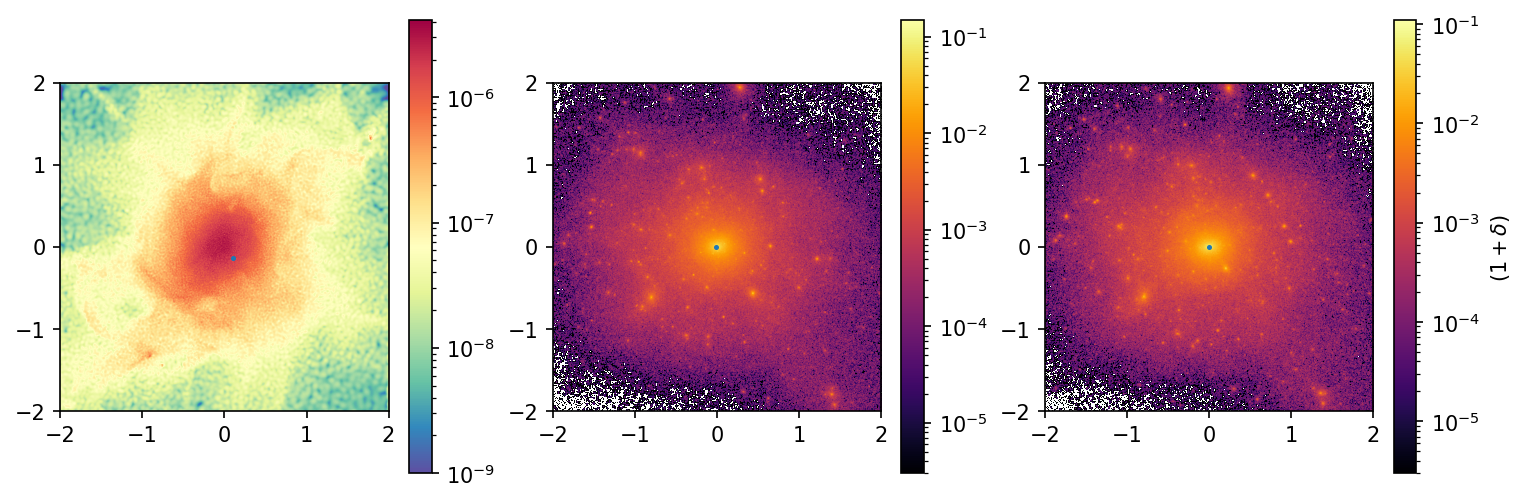

In [119]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(12,4), dpi=150)
im1 = ax1.imshow(rhob[180:230].mean(axis=0), norm=LogNorm(vmin=1e-9), cmap='Spectral_r', extent=[-loc_box,loc_box,-loc_box,loc_box], origin='lower')
ax1.scatter(*find_peak(rhob_slice,[-loc_box,loc_box]), s=2)
cb1 = fig.colorbar(im1,ax=ax1)
# cb1.set_label(r"$(1+\delta)$")
im2 = ax2.imshow(rhod_slice, norm=LogNorm(vmin=3e-6), cmap='inferno', extent=[-loc_box,loc_box,-loc_box,loc_box], origin='lower')
ax2.scatter(*find_peak(rhod_slice,[-loc_box,loc_box]), s=2)
cb2 = fig.colorbar(im2,ax=ax2)
# cb2.set_label(r"$(1+\delta)$")
im3 = ax3.imshow(rhod_dmo_slice, norm=LogNorm(vmin=3e-6), cmap='inferno', extent=[-loc_box,loc_box,-loc_box,loc_box], origin='lower')
ax3.scatter(*find_peak(rhod_dmo_slice,[-loc_box,loc_box]), s=2)
cb3 = fig.colorbar(im3,ax=ax3)
cb3.set_label(r"$(1+\delta)$")

In [176]:
Rad_bin_edge = np.logspace(-2,np.log10(2*R),50)

In [177]:
Rad_bin_edge = np.insert(Rad_bin_edge,0,0)
Rad_bin_edge

array([0.00000000e+00, 1.00000000e-02, 1.27736328e-02, 1.63165696e-02,
       2.08421869e-02, 2.66230443e-02, 3.40072993e-02, 4.34396755e-02,
       5.54882466e-02, 7.08786488e-02, 9.05377836e-02, 1.15649641e-01,
       1.47726605e-01, 1.88700541e-01, 2.41039143e-01, 3.07894551e-01,
       3.93293194e-01, 5.02378286e-01, 6.41719577e-01, 8.19709026e-01,
       1.04706621e+00, 1.33748394e+00, 1.70845287e+00, 2.18231497e+00,
       2.78760902e+00, 3.56078941e+00, 4.54842166e+00, 5.80998682e+00,
       7.42146385e+00, 9.47990543e+00, 1.21092831e+01, 1.54679537e+01,
       1.97581961e+01, 2.52383942e+01, 3.22385981e+01, 4.11804016e+01,
       5.26023330e+01, 6.71922888e+01, 8.58289627e+01, 1.09634766e+02,
       1.40043424e+02, 1.78886328e+02, 2.28502828e+02, 2.91881122e+02,
       3.72838229e+02, 4.76249864e+02, 6.08344091e+02, 7.77076405e+02,
       9.92608869e+02, 1.26792212e+03, 1.61959717e+03])

In [178]:
# Rad_bin_edge = np.linspace(0, 2*R, 60)

In [179]:
Rad_bin_cen = (Rad_bin_edge[1:] + Rad_bin_edge[:-1])/ 2

In [180]:
Rad_bin_cen

array([5.00000000e-03, 1.13868164e-02, 1.45451012e-02, 1.85793782e-02,
       2.37326156e-02, 3.03151718e-02, 3.87234874e-02, 4.94639610e-02,
       6.31834477e-02, 8.07082162e-02, 1.03093712e-01, 1.31688123e-01,
       1.68213573e-01, 2.14869842e-01, 2.74466847e-01, 3.50593872e-01,
       4.47835740e-01, 5.72048932e-01, 7.30714302e-01, 9.33387620e-01,
       1.19227508e+00, 1.52296841e+00, 1.94538392e+00, 2.48496200e+00,
       3.17419922e+00, 4.05460553e+00, 5.17920424e+00, 6.61572534e+00,
       8.45068464e+00, 1.07945943e+01, 1.37886184e+01, 1.76130749e+01,
       2.24982952e+01, 2.87384962e+01, 3.67094999e+01, 4.68913673e+01,
       5.98973109e+01, 7.65106257e+01, 9.77318641e+01, 1.24839095e+02,
       1.59464876e+02, 2.03694578e+02, 2.60191975e+02, 3.32359676e+02,
       4.24544047e+02, 5.42296977e+02, 6.92710248e+02, 8.84842637e+02,
       1.13026550e+03, 1.44375965e+03])

In [181]:
# vir_dens = config['Virial_density']*config['Critical_density']/p18py.Om(z)/ (h**2/a**3)

In [182]:
# config['Critical_density']/ (h**2/a**3)

In [183]:
# h**2/a**3

In [184]:
vir_dens= 200* 84993066794.41269/1e8

In [185]:
find_peak(rhod_dmo_slice,[-loc_box,loc_box])
find_peak(rhod,[-loc_box*R,loc_box*R])

array([-3.16327572, -3.16327572, -3.16327572])

In [186]:
posd_r = np.linalg.norm(posd_sel, axis=1)

In [187]:
mass_profile = np.histogram(posd_r, Rad_bin_edge)[0]* snap.mass_table[1]*1e10

In [188]:
mass_profile

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 1.57372267e+08, 3.14744534e+08,
       6.29489067e+08, 9.44233601e+08, 7.86861334e+08, 3.61956214e+09,
       4.87854027e+09, 6.45226294e+09, 9.59970828e+09, 1.63667157e+10,
       2.10878838e+10, 2.86417526e+10, 4.35921179e+10, 5.85424833e+10,
       8.98595644e+10, 1.37071244e+11, 2.03639713e+11, 3.15531395e+11,
       4.98555341e+11, 7.45157683e+11, 1.10821550e+12, 1.55216267e+12,
       2.22209641e+12, 3.05868738e+12, 4.17854843e+12, 5.57821737e+12,
       6.98606967e+12, 8.11017977e+12, 1.04356698e+13, 1.14544978e+13,
       1.42283414e+13, 1.47701741e+13, 1.56095978e+13, 2.01367258e+13,
       2.02095891e+13, 1.71375251e+13])

[0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00
 0.00000000e+00 0.00000000e+00 1.45561487e+04 1.39679668e+04
 1.34035520e+04 9.64645796e+03 3.85694409e+03 8.51251498e+03
 5.50488766e+03 3.49323126e+03 2.49361860e+03 2.03981249e+03
 1.26100968e+03 8.21753805e+02 6.00076775e+02 3.86657735e+02
 2.84758427e+02 2.08408461e+02 1.48555310e+02 1.10439643e+02
 8.37244889e+01 6.00404625e+01 4.28426948e+01 2.87903210e+01
 1.97755642e+01 1.30604395e+01 8.56061279e+00 5.48316811e+00
 3.29477494e+00 1.83518578e+00 1.13299136e+00 5.96676641e-01
 3.55610007e-01 1.77117725e-01 8.98100289e-02 5.55876985e-02
 2.67672673e-02 1.08905890e-02]


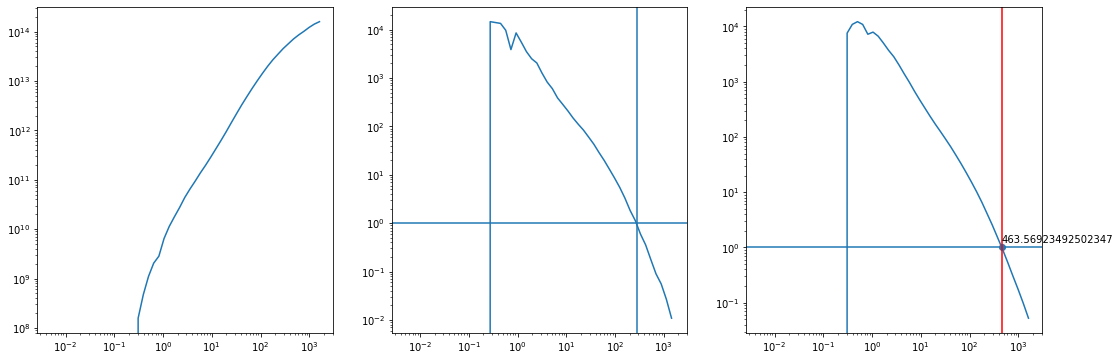

In [189]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(18,6), sharex=True)
ax1.loglog(Rad_bin_edge[1:], np.cumsum(mass_profile))
# ax1.set_xlim(1e-2,2)
rhor = mass_profile/ (4/3*np.pi* (Rad_bin_edge[1:]**3-Rad_bin_edge[:-1]**3) )/ vir_dens
print(rhor)
r_rho_is_vir = interp1d(rhor, Rad_bin_cen)(1)
ax2.loglog(Rad_bin_cen, rhor,)
ax2.axhline(1)
ax2.axvline(r_rho_is_vir)
rhoR = np.cumsum(mass_profile)/ (4/3*np.pi* (Rad_bin_edge[1:]**3))/ vir_dens
r_vir = interp1d(rhoR, Rad_bin_edge[1:])(1)
#     idx_vir = np.argwhere(np.diff(np.sign(rhoR-1))).flatten()
ax3.loglog(Rad_bin_edge[1:], rhoR ,)
ax3.axhline(1)
ax3.axvline(r_vir,color='red')
# ax3.axvline(r_vir_vr_mean, color='green')
ax3.scatter(r_vir,1)
ax3.annotate(f'{r_vir}', (r_vir,1.2))
#     plt.ylim(0, 3)
plt.show()
sleep(.01)
plt.close()

In [190]:
posd_dmo_r = np.linalg.norm(posd_dmo_sel, axis=1)

In [191]:
mass_profile_dmo = np.histogram(posd_dmo_r, Rad_bin_edge)[0]* snap_dmo.mass_table[1]*1e10

In [192]:
# mass_profile_dmo

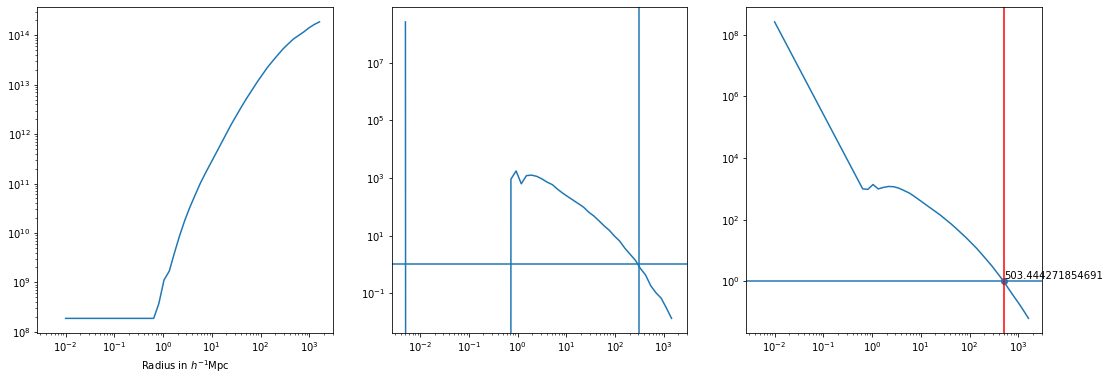

In [193]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(18,6), sharex=True)
ax1.loglog(Rad_bin_edge[1:], np.cumsum(mass_profile_dmo))
# ax1.set_xlim(1e-2,2)
ax1.set_xlabel('Radius in $h^{-1}$Mpc')
rhor = mass_profile_dmo/ (4/3*np.pi* (Rad_bin_edge[1:]**3-Rad_bin_edge[:-1]**3) )/ vir_dens
r_rho_is_vir = interp1d(rhor, Rad_bin_cen)(1)
ax2.loglog(Rad_bin_cen, rhor,)
ax2.axhline(1)
ax2.axvline(r_rho_is_vir)
rhoR = np.cumsum(mass_profile_dmo)/ (4/3*np.pi* (Rad_bin_edge[1:]**3))/ vir_dens
r_vir = interp1d(rhoR, Rad_bin_edge[1:])(1)
#     idx_vir = np.argwhere(np.diff(np.sign(rhoR-1))).flatten()
ax3.loglog(Rad_bin_edge[1:], rhoR ,)
ax3.axhline(1)
ax3.axvline(r_vir,color='red')
# ax3.axvline(r_vir_vr_mean, color='green')
ax3.scatter(r_vir,1)
ax3.annotate(f'{r_vir}', (r_vir,1.2))
#     plt.ylim(0, 3)
plt.show()
sleep(.01)
plt.close()

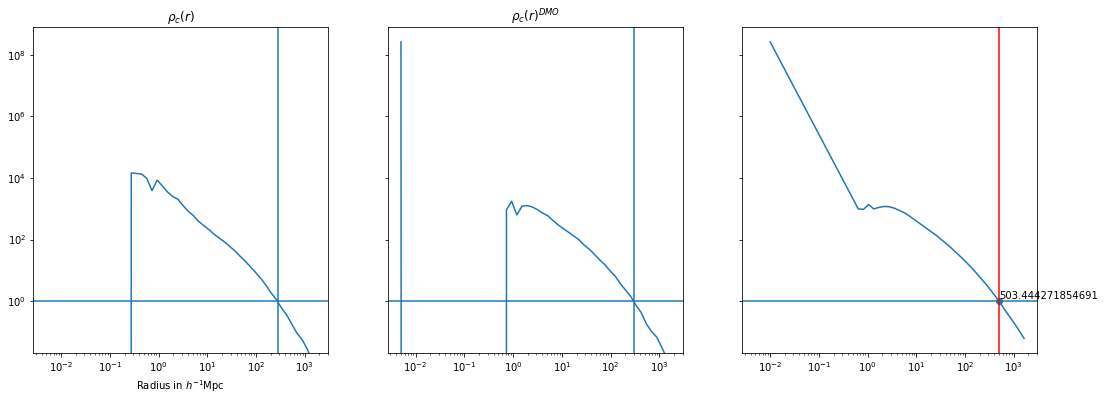

In [194]:
fig, (ax1,ax2, ax3) = plt.subplots(1,3, figsize=(18,6), sharex=True, sharey=True)
# ax1.loglog(Rad_bin_edge[1:], np.cumsum(mass_profile_dmo))
# ax1.set_xlim(1e-2,2)
rhor = mass_profile/ (4/3*np.pi* (Rad_bin_edge[1:]**3-Rad_bin_edge[:-1]**3) )/ vir_dens
r_rho_is_vir = interp1d(rhor, Rad_bin_cen)(1)
ax1.loglog(Rad_bin_cen, rhor,)
ax1.axhline(1)
ax1.axvline(r_rho_is_vir)
ax1.set_xlabel('Radius in $h^{-1}$Mpc')
ax1.set_title(r'$\rho_{c}(r)$')
rhor_dmo = mass_profile_dmo/ (4/3*np.pi* (Rad_bin_edge[1:]**3-Rad_bin_edge[:-1]**3) )/ vir_dens
r_rho_dmo_is_vir = interp1d(rhor_dmo, Rad_bin_cen)(1)
ax2.loglog(Rad_bin_cen, rhor_dmo,)
ax2.axhline(1)
ax2.axvline(r_rho_dmo_is_vir)
ax2.set_title(r'$\rho_{c}(r)^{DMO}$')
rhoR = np.cumsum(mass_profile_dmo)/ (4/3*np.pi* (Rad_bin_edge[1:]**3))/ vir_dens
r_vir = interp1d(rhoR, Rad_bin_edge[1:])(1)
#     idx_vir = np.argwhere(np.diff(np.sign(rhoR-1))).flatten()
ax3.loglog(Rad_bin_edge[1:], rhoR ,)
ax3.axhline(1)
ax3.axvline(r_vir,color='red')
# ax3.axvline(r_vir_vr_mean, color='green')
ax3.scatter(r_vir,1)
ax3.annotate(f'{r_vir}', (r_vir,1.2))
#     plt.ylim(0, 3)
plt.show()
sleep(.01)
plt.close()

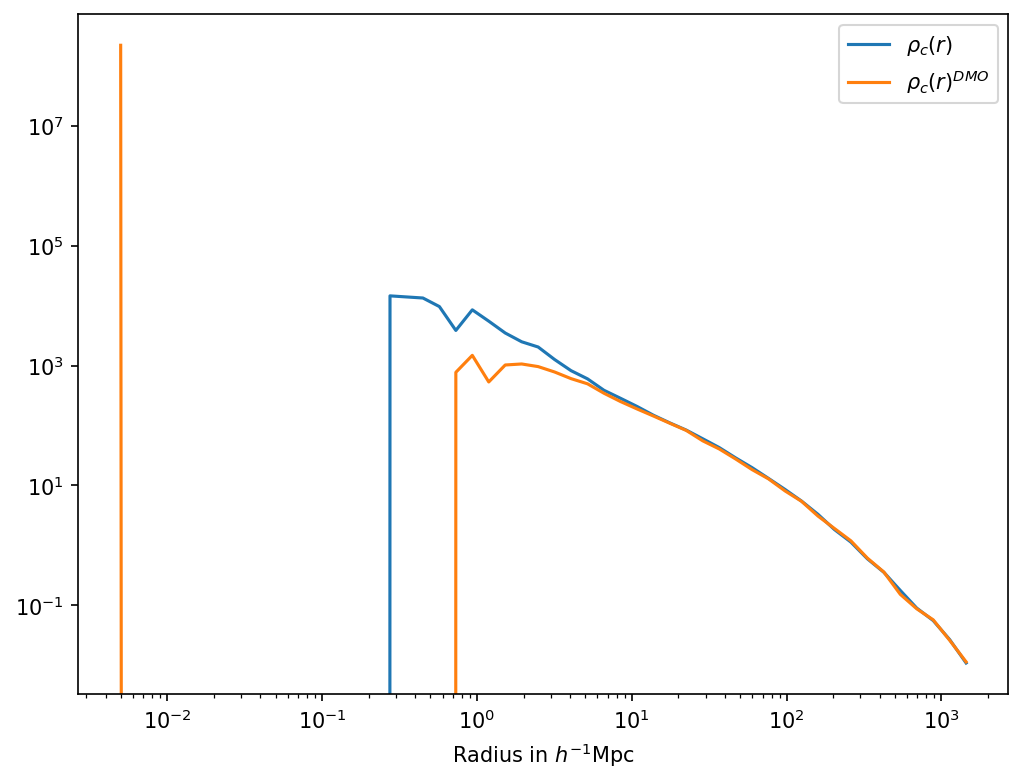

In [195]:
fig, ax1 = plt.subplots(1,1, figsize=(8,6), sharex=True, sharey=True, dpi=150)
rhor = mass_profile/ (4/3*np.pi* (Rad_bin_edge[1:]**3-Rad_bin_edge[:-1]**3) )/ vir_dens 
# r_rho_is_vir = interp1d(rhor, Rad_bin_cen)(1)
ax1.loglog(Rad_bin_cen, rhor, label=r'$\rho_{c}(r)$')
# ax1.axhline(1)
# ax1.axvline(r_rho_is_vir)
ax1.set_xlabel('Radius in $h^{-1}$Mpc')
# ax1.set_title(r'$\rho_{c}(r)$')
rhor_dmo = mass_profile_dmo/ (4/3*np.pi* (Rad_bin_edge[1:]**3-Rad_bin_edge[:-1]**3) )/ vir_dens *snap.mass_table[1]/snap_dmo.mass_table[1]
# r_rho_dmo_is_vir = interp1d(rhor_dmo, Rad_bin_cen)(1)
ax1.loglog(Rad_bin_cen, rhor_dmo, label=r'$\rho_{c}(r)^{DMO}$')
# ax1.axhline(1)
# ax2.axvline(r_rho_dmo_is_vir)
# ax2.set_title(r'$\rho_{c}(r)^{DMO}$')
plt.legend()
# plt.close()

In [196]:
vir_dens

169986.13358882538

In [502]:
# posb_r = np.linalg.norm(posb_sel-find_peak(rhob,[-loc_box*R,loc_box*R]), axis=1)

In [120]:
peakidx = find_peak_idx(rhob)

In [127]:
peakidx = (255,255,255)

In [128]:
idxs = np.indices(rhob.shape)
idxs.shape

(3, 512, 512, 512)

In [129]:
for axi in (0,1,2):
    idxs[axi] -= peakidx[axi]

In [130]:
# idxs

In [131]:
cellb_r = np.linalg.norm(idxs, axis=0) * (2*loc_box*R / rhob.shape[0])
cellb_r.shape

(512, 512, 512)

In [132]:
cellb_r.mean()

1555.7769138232113

In [133]:
df_cell = pd.DataFrame(data={'r':np.ravel(cellb_r), 'dens':np.ravel(rhob),} )

In [134]:
np.ravel(cellb_r).shape

(134217728,)

In [135]:
# df_cell.iloc[11000:11100]

In [136]:
# df

In [138]:
# df_cell_sam = df_cell.sample(frac=.001)
df_cell_sam = df_cell.sort_values('r')

In [139]:
dens_profile_bar = df_cell_sam.dens.groupby(pd.cut(df_cell_sam.r,bins=Rad_bin_edge)).mean().to_numpy()

In [140]:
dens_profile_bar*=1e10

In [141]:
Rad_bin_edge.shape

(51,)

In [142]:
dens_profile_bar.shape

(50,)

In [143]:
mass_profile_bar = dens_profile_bar * (4/3*np.pi* (Rad_bin_edge[1:]**3-Rad_bin_edge[:-1]**3))

In [197]:
mass_profile_bar = np.nan_to_num(mass_profile_bar)

In [198]:
f_bar = 1 - snap.mass_table[1]/snap_dmo.mass_table[1]
f_dm = 1 - f_bar

In [199]:
r, Mdr, Mbr, Mdr_dmo = Rad_bin_edge[1:], np.cumsum(mass_profile), np.cumsum(mass_profile_bar), np.cumsum(mass_profile_dmo)*f_dm
# r, Mdr, Mbr, Mdr_dmo

In [200]:
ri_M = interp1d(Mdr_dmo,r, fill_value='extrapolate')

In [201]:
# ri_M(Mdr_dmo)

In [202]:
rf = r

In [203]:
ri = ri_M(Mdr)

/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/site-packages/scipy/interpolate/interpolate.py:623: RuntimeWarning: divide by zero encountered in true_divide
  slope = (y_hi - y_lo) / (x_hi - x_lo)[:, None]


In [204]:
Mf = Mdr+Mbr

In [205]:
Mi = Mdr/f_dm

In [206]:
MiMf = ( f_dm* (Mbr/ Mdr + 1) )**-1
# MiMf

<ipython-input-206-301daa159431>:1: RuntimeWarning: invalid value encountered in true_divide
  MiMf = ( f_dm* (Mbr/ Mdr + 1) )**-1


In [207]:
Mbr

array([0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 8.41004731e+08, 3.32311815e+10, 4.03413740e+11,
       1.43855812e+12, 3.00075100e+12, 4.99315304e+12, 7.37650192e+12,
       1.00349564e+13, 1.27192760e+13, 1.54210333e+13, 1.82285415e+13,
       2.09866542e+13, 2.40969756e+13])

<ipython-input-307-af84a77ed128>:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(Mi/Mf,rf/ri,'o')
<ipython-input-307-af84a77ed128>:2: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(Mi/Mf,rf/2000)#,'o')


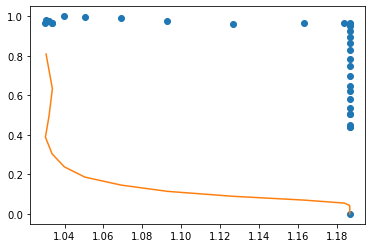

In [307]:
plt.plot(Mi/Mf,rf/ri,'o')
plt.plot(Mi/Mf,rf/2000)#,'o')
# plt.xlim(0,1)
# plt.ylim(0,1)

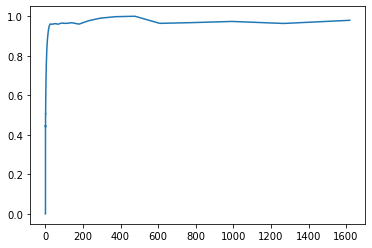

In [209]:
plt.plot(rf, rf/ri)

<ipython-input-210-af1b1219d843>:1: RuntimeWarning: invalid value encountered in true_divide
  plt.plot(rf, Mi/Mf)


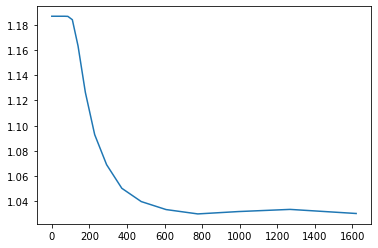

In [210]:
plt.plot(rf, Mi/Mf)

In [75]:
# posd_sel

In [76]:
# rhod.max()

In [77]:
exte = np.array([-2,3,-4,5,-6,7])

In [78]:
exte.reshape(3,2)

array([[-2,  3],
       [-4,  5],
       [-6,  7]])

In [79]:
find_peak(rhob_slice,[-2,2])

array([-0.0078125,  0.       ])

In [80]:
np.unravel_index(rhob_slice.argmax(), rhob_slice.shape)

(255, 256)

In [81]:
rhob_slice[234,230]

0.07634362992900065

In [89]:
rhob_slice.max()

0.19735149384081163

In [171]:
deltad = assign_density(posd, L, scheme='CIC')#, overdensity=False)

In [172]:
# deltab = assign_density(posb, L, scheme='NGP')

In [173]:
deltad_slice = deltad[:,:,z_slc-2:z_slc+2].mean(axis=2)

In [174]:
# deltad_slice = deltad[:256]

In [175]:
# deltab_slice = deltab[100:150].mean(axis=0)

In [176]:
# deltad_slice

In [177]:
# vmin=5e-2,vmax=5e2, extent=[0,snap.box_size,0,snap.box_size]

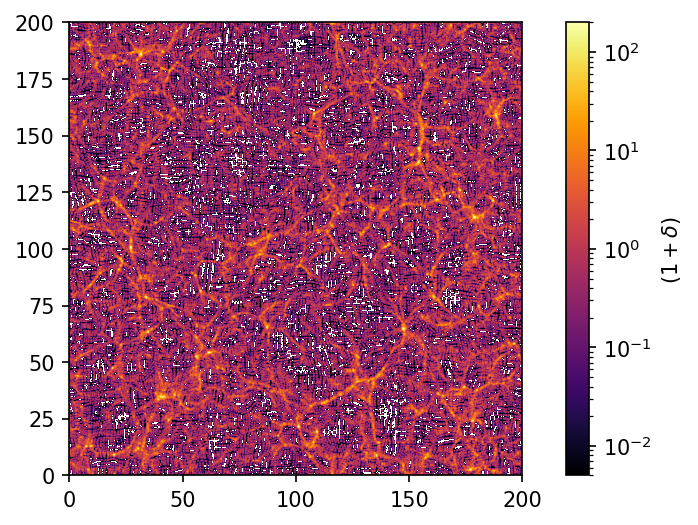

In [178]:
fig1, ax1 = plt.subplots(1,1, figsize=(7.5,4), dpi=150)
im1 = ax1.imshow(deltad_slice+1, norm=LogNorm(vmin=5e-3,vmax=2e2), cmap='inferno', extent=[0,snap.box_size,0,snap.box_size], origin='lower')
cb1 = fig1.colorbar(im1,ax=ax1)
cb1.set_label(r"$(1+\delta)$")

In [51]:
fname = f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18_bar/{rund:s}/snaps/snapdir_{i:03d}/snapshot_{i:03d}.0.hdf5"

In [52]:
unit_base = {'UnitLength_in_cm'         : 3.08568e+24,
             'UnitMass_in_g'            :   1.989e+43,
             'UnitVelocity_in_cm_per_s' :      100000}

bbox_lim = L #Mpc

bbox = [[0,bbox_lim],
        [0,bbox_lim],
        [0,bbox_lim]]
 
ds = yt.load(fname, unit_base=unit_base)#, bounding_box=bbox)#, cosmology_parameters={})
ds.index

yt : [INFO     ] 2021-05-04 13:23:47,221 Calculating time from 4.823e-01 to be 1.766e+17 seconds
yt : [INFO     ] 2021-05-04 13:23:47,250 Parameters: current_time              = 1.765662122310988e+17 s
yt : [INFO     ] 2021-05-04 13:23:47,251 Parameters: domain_dimensions         = [2 2 2]
yt : [INFO     ] 2021-05-04 13:23:47,252 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-05-04 13:23:47,253 Parameters: domain_right_edge         = [200. 200. 200.]
yt : [INFO     ] 2021-05-04 13:23:47,254 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-05-04 13:23:47,254 Parameters: current_redshift          = 1.0735799419483163
yt : [INFO     ] 2021-05-04 13:23:47,255 Parameters: omega_lambda              = 0.6936625
yt : [INFO     ] 2021-05-04 13:23:47,255 Parameters: omega_matter              = 0.3063375
yt : [INFO     ] 2021-05-04 13:23:47,256 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-05-04 13:23:47,257 Parameters: hubble_constant 

In [53]:
ad= ds.all_data()

In [54]:
ds.fields

In [ ]:
px1 = yt.SlicePlot(ds, 'z', ('deposit', 'PartType1_density'))

yt : [INFO     ] 2021-05-04 13:24:06,292 xlim = 0.000000 200.000000
yt : [INFO     ] 2021-05-04 13:24:06,293 ylim = 0.000000 200.000000
yt : [INFO     ] 2021-05-04 13:24:06,294 xlim = 0.000000 200.000000
yt : [INFO     ] 2021-05-04 13:24:06,295 ylim = 0.000000 200.000000
yt : [INFO     ] 2021-05-04 13:24:06,296 Making a fixed resolution buffer of (('deposit', 'PartType1_density')) 800 by 800


In [ ]:
px1.show()

/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]


In [33]:
px2 = yt.SlicePlot(ds, 'z', ('gas', 'density'))

yt : [INFO     ] 2021-05-04 10:56:22,719 xlim = 0.000000 200.000000
yt : [INFO     ] 2021-05-04 10:56:22,721 ylim = 0.000000 200.000000
yt : [INFO     ] 2021-05-04 10:56:22,723 xlim = 0.000000 200.000000
yt : [INFO     ] 2021-05-04 10:56:22,724 ylim = 0.000000 200.000000
yt : [INFO     ] 2021-05-04 10:56:22,730 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800


/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]



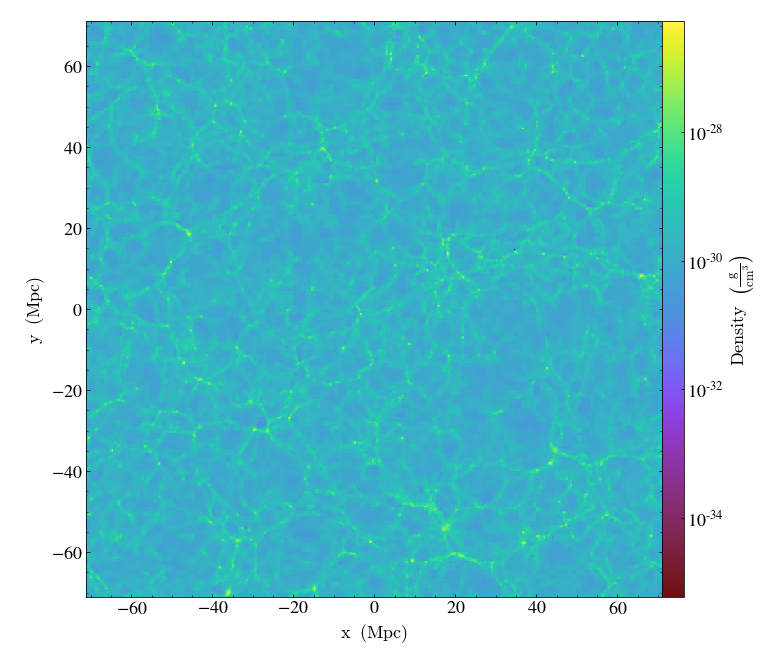

In [34]:
px2.show()

In [165]:
h

0.6781

In [166]:
a

0.526628

In [167]:
z

0.8988735881874872

In [168]:
fac = a/h

In [169]:
fac*200

155.32458339477952

In [170]:
px3 = yt.SlicePlot(ds, 'z', ('gas', 'density'), width=(3,3), origin='native', center=[ds.quan(X*fac, 'Mpc'), ds.quan(Y*fac, 'Mpc'), ds.quan(Z*fac, 'Mpc')])

NameError: name 'ds' is not defined

In [ ]:
px3.show()


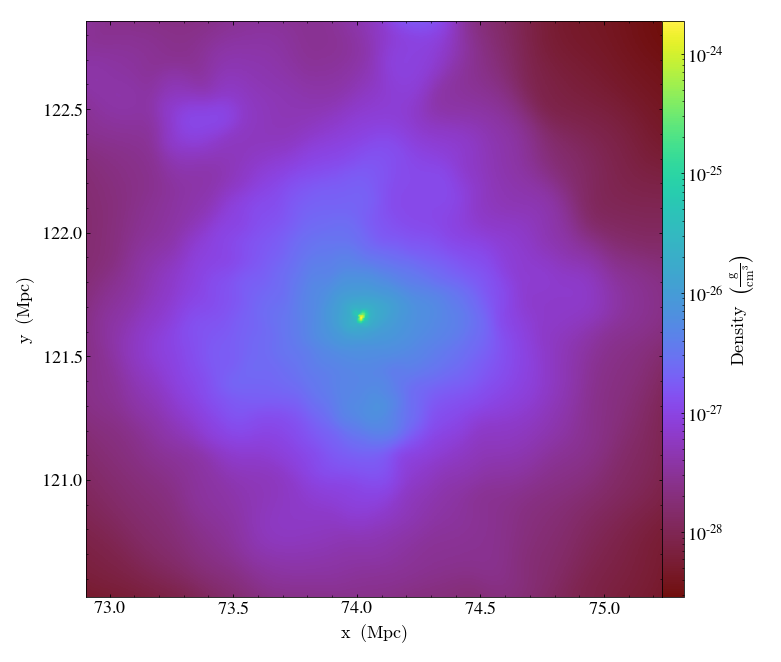

In [157]:
px3.show()


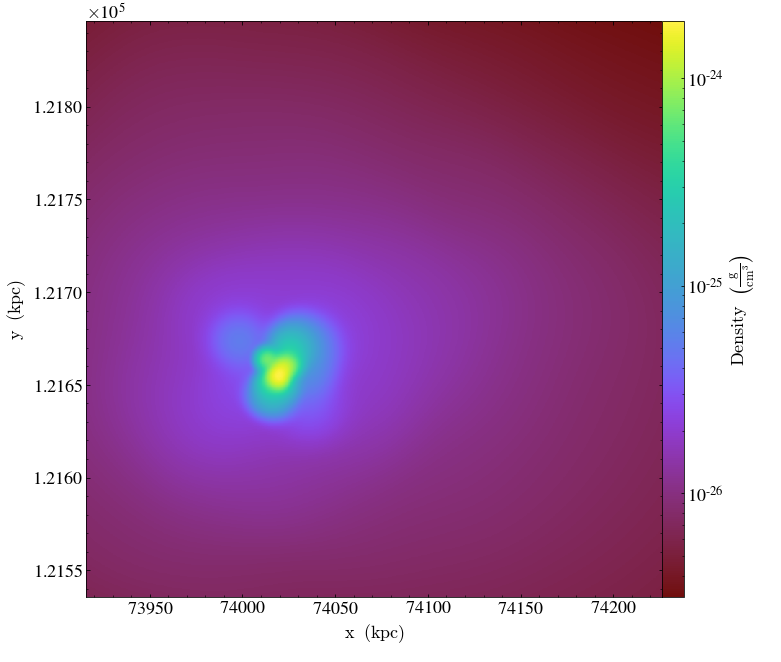

In [155]:
px3.show()

In [42]:
px4 = yt.SlicePlot(ds, 'z', ('deposit', 'PartType1_cic'), width=(5,5), origin='native', center=[ds.quan(X*fac, 'Mpc'), ds.quan(Y*fac, 'Mpc'), ds.quan(Z*fac, 'Mpc')])

yt : [INFO     ] 2021-05-04 10:59:27,526 xlim = 72.293183 75.849134
yt : [INFO     ] 2021-05-04 10:59:27,529 ylim = 119.912822 123.468773
yt : [INFO     ] 2021-05-04 10:59:27,531 xlim = 101.650971 106.650971
yt : [INFO     ] 2021-05-04 10:59:27,532 ylim = 168.608634 173.608634
yt : [INFO     ] 2021-05-04 10:59:27,535 Making a fixed resolution buffer of (('deposit', 'PartType1_cic')) 800 by 800


/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The mathtext.fallback_to_cm rcparam was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: Support for setting the 'mathtext.fallback_to_cm' rcParam is deprecated since 3.3 and will be removed two minor releases later; use 'mathtext.fallback : 'cm' instead.
  self[key] = other[key]
/mnt/home/student/cprem/anaconda3/envs/conforg/lib/python3.9/_collections_abc.py:940: MatplotlibDeprecationWarning: 
The validate_bool_maybe_none function was deprecated in Matplotlib 3.3 and will be removed two minor releases later.
  self[key] = other[key]



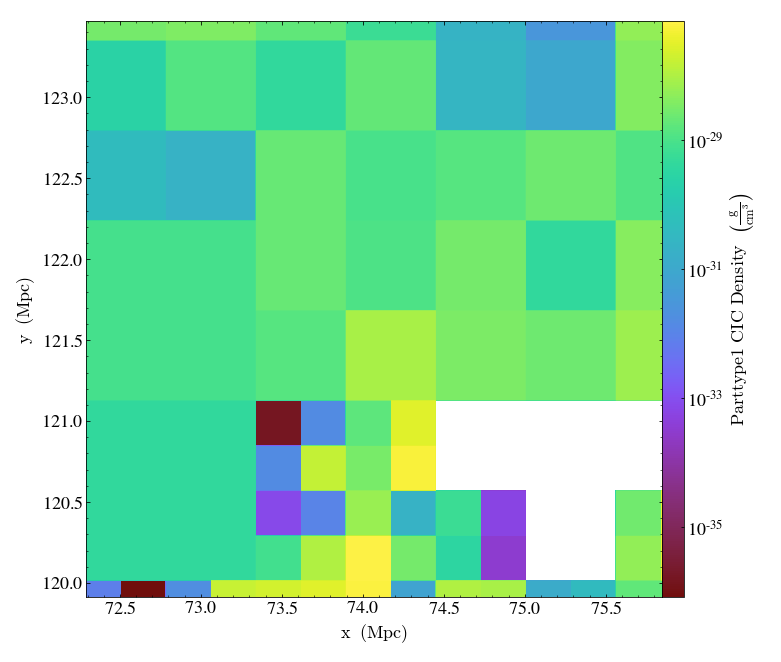

In [43]:
px4.show()

In [88]:
fname_dm = f"/scratch/cprem/sims/L{L:d}_N{N:d}_Cp18/{rund:s}/snaps/snapdir_{i:03d}/snapshot_{i:03d}.0.hdf5"

In [89]:
unit_base = {'UnitLength_in_cm'         : 3.08568e+24,
             'UnitMass_in_g'            :   1.989e+43,
             'UnitVelocity_in_cm_per_s' :      100000}

bbox_lim = L #Mpc

bbox = [[0,bbox_lim],
        [0,bbox_lim],
        [0,bbox_lim]]
 
ds_dm = yt.load(fname, unit_base=unit_base)#, bounding_box=bbox)#, cosmology_parameters={})
ds_dm.index

yt : [INFO     ] 2021-05-04 00:35:12,893 Calculating time from 5.266e-01 to be 1.994e+17 seconds
yt : [INFO     ] 2021-05-04 00:35:13,044 Parameters: current_time              = 1.9936556826647987e+17 s
yt : [INFO     ] 2021-05-04 00:35:13,046 Parameters: domain_dimensions         = [1 1 1]
yt : [INFO     ] 2021-05-04 00:35:13,047 Parameters: domain_left_edge          = [0. 0. 0.]
yt : [INFO     ] 2021-05-04 00:35:13,048 Parameters: domain_right_edge         = [200. 200. 200.]
yt : [INFO     ] 2021-05-04 00:35:13,049 Parameters: cosmological_simulation   = 1
yt : [INFO     ] 2021-05-04 00:35:13,049 Parameters: current_redshift          = 0.8988727454476295
yt : [INFO     ] 2021-05-04 00:35:13,050 Parameters: omega_lambda              = 0.6936625
yt : [INFO     ] 2021-05-04 00:35:13,051 Parameters: omega_matter              = 0.3063375
yt : [INFO     ] 2021-05-04 00:35:13,051 Parameters: omega_radiation           = 0.0
yt : [INFO     ] 2021-05-04 00:35:13,052 Parameters: hubble_constant

In [90]:
ad_dm= ds.all_data()

In [91]:
ds_dm.fields

In [ ]:
px1 = yt.SlicePlot(ds_dm, 'z', ('gas', 'density'))

In [ ]:
px1.show()

In [47]:
px3 = yt.SlicePlot(ds_dm, 'z', ('gas', 'density'), width=(5000,5000), origin='native', center=[ds.quan(10.8, 'Mpc'), ds.quan(36.3, 'Mpc'), ds.quan(31.5, 'Mpc')])

yt : [INFO     ] 2021-04-14 01:01:18,654 xlim = 7.109418 14.490582
yt : [INFO     ] 2021-04-14 01:01:18,657 ylim = 32.609418 39.990582
yt : [INFO     ] 2021-04-14 01:01:18,658 xlim = 4815.919006 9815.919006
yt : [INFO     ] 2021-04-14 01:01:18,659 ylim = 22089.616661 27089.616661
yt : [INFO     ] 2021-04-14 01:01:18,661 Making a fixed resolution buffer of (('gas', 'density')) 800 by 800



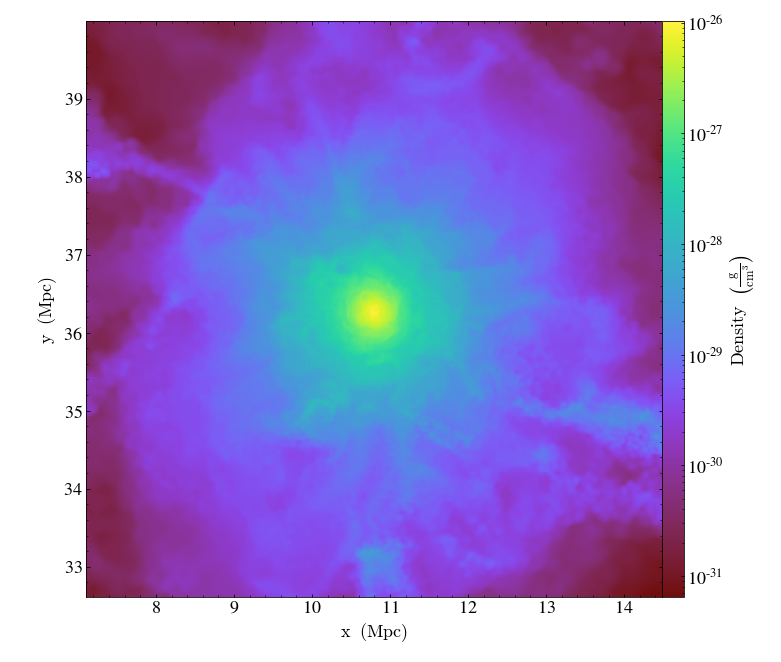

In [48]:
px3.show()